# Juhusliku suuruse jaotusseaduse uurimine võrgupinge näite varal

Üliõpilane Jander Metsma

Praktikumirühm AT 4

### 1. Loeme faili

In [1]:
import csv 
import numpy as np

with open("C:\\Users\\ThinkpadT490s\\Desktop\\Tudeng T14.prn", newline='\n') as file_name:
    file_read = csv.reader(file_name, delimiter='\t',quoting=csv.QUOTE_NONNUMERIC)
    array = list(file_read)


### 2. Aritmeetilise keskmise ja standardhälbe arvutamine

Pinge ja aja saamine failist

In [2]:
Pinge = [x for x in array[2] if (isinstance(x, float))]
Aeg = [x for x in array[1] if (isinstance(x, float))]

Arvutus

In [3]:
KV=np.average(Pinge)
print("Keskväärtus:",round(KV, 3),end='V\n',)
summa = 0.0
for a in Pinge:
    summa=summa+(a-KV)**2
sigma = np.sqrt(summa/len(Pinge))
print("Standardhälve:",round(sigma, 3),end="V")

Keskväärtus: 235.519V
Standardhälve: 0.139V

### 3. Graafik 1: Toor-andmed

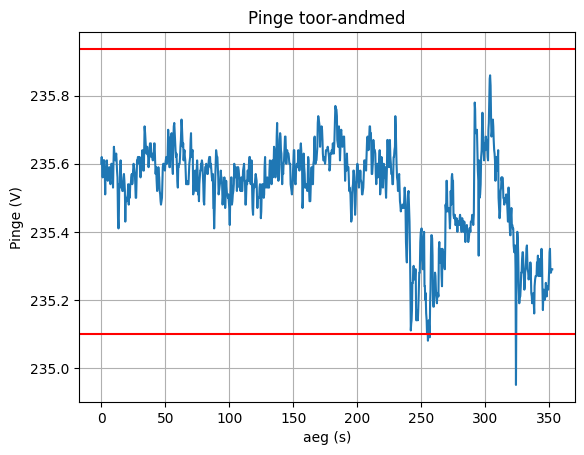

In [4]:
import matplotlib.pyplot as plt
x = Aeg
y = Pinge
plt.plot(x, y)

üleminePiir=KV+3*sigma
aluminePiir=KV-(3*sigma)

plt.axhline(y=üleminePiir,color='red' )
plt.axhline(y=aluminePiir,color='red' )

plt.xlabel('aeg (s)')
plt.ylabel('Pinge (V)')
plt.title('Pinge toor-andmed')
plt.grid()
plt.show()

### 4. Eksete eemdaldamine

In [5]:
i=0
uPinge=[]
uAeg=[]
for a in Pinge:
    if a<üleminePiir and a>aluminePiir:
        uPinge.append(a)
        uAeg.append(Aeg[i])
    i=i+1

### 5. Graafik 2: Puhastatud pinge graafik

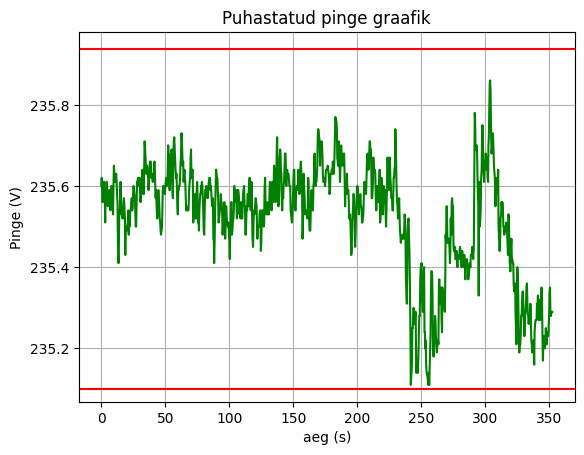

In [6]:
x = uAeg
y = uPinge
plt.plot(x, y,color='green')

üleminePiir=KV+3*sigma
aluminePiir=KV-(3*sigma)
plt.axhline(y=üleminePiir,color='red' )
plt.axhline(y=aluminePiir,color='red' )

plt.xlabel('aeg (s)')
plt.ylabel('Pinge (V)')
plt.title('Puhastatud pinge graafik')

plt.grid()
plt.show()

### 6. Histogramm

#### - Uued andmed

In [7]:
KV=np.average(uPinge)
sigma=(np.std(uPinge))
SuurimPinge=(np.max(Pinge))
VäikseimPinge=(np.min(Pinge))

#### - Graafik 3: Pinge histogramm

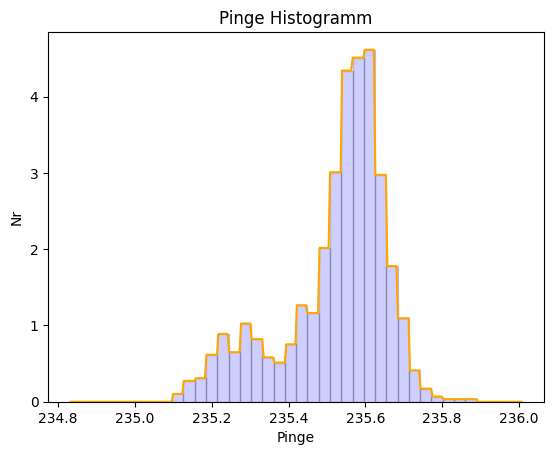

In [8]:
def histstep(xk,lahtrid,values):
    if xk >= lahtrid[0] and xk<lahtrid[len(lahtrid)-1]:
        i=0
        for xtemp in lahtrid:
            if (xk<lahtrid[i+1]):
                return values[i]
            i=i+1
    else:
        return 0

jaotusi=int(1.0*np.sqrt(len(uPinge)))
samm=(SuurimPinge-VäikseimPinge)/jaotusi
ülekate=4
lahtrid=[]
for a in range(-ülekate,jaotusi+ülekate):
    lahtrid.append(VäikseimPinge+samm*a)

a=plt.hist(uPinge, bins=lahtrid, density=True, histtype='bar', color='blue', edgecolor='black', alpha=0.19)
plt.xlabel('Pinge')
plt.ylabel('Nr')
plt.title('Pinge Histogramm')

ya = a[0]
xa = a[1]

yy = []
x = np.linspace(start=VäikseimPinge-ülekate*samm, stop=SuurimPinge+(ülekate+1)*(samm), num=300)
for xxk in x:
    yy.append(histstep(xxk,xa,ya))

plt.plot(x, yy,color='orange')
plt.show()

#### - Graafik 4: Normaaljaotus

Normaaljaotuse arvtamine:

In [9]:
def normaaljaotus(koordinaat, keskväärtus, standarthälve):
    return 1/(standarthälve*np.sqrt(2*np.pi))*np.exp(-(koordinaat-keskväärtus)**2/(2*standarthälve**2))

Graafik:

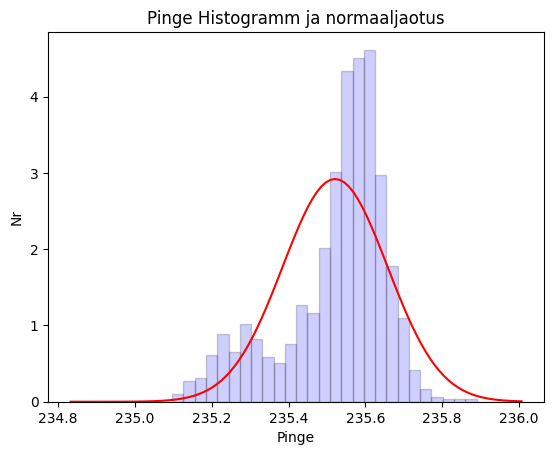

In [10]:
plt.hist(uPinge, bins=lahtrid, density=True, histtype='bar', color='blue', edgecolor='black', alpha=0.19)
plt.xlabel('Pinge')
plt.ylabel('Nr')
plt.title('Pinge Histogramm ja normaaljaotus')

x = np.linspace(start=VäikseimPinge-ülekate*samm, stop=SuurimPinge+(ülekate+1)*(samm), num=100)
y = normaaljaotus(x,KV,sigma)

plt.plot(x, y,color='red')
plt.show()

#### 7. Määramatused ABC

In [11]:
u_A=sigma/len(uPinge)
print("A tüüpi määramatus =",u_A)

A tüüpi määramatus = 0.00013709824531726826


In [12]:
u_B=(0.01*KV+100*0.01)/np.sqrt(3)
print("B tüüpi määramatus=",u_B)

B tüüpi määramatus= 1.937131767571509


In [13]:
u_C=np.sqrt(u_A**2+u_B**2)
print("C tüüpi määramatus =",u_C)

C tüüpi määramatus = 1.9371317724229933


##### - Pinge arvutuse tulemus:

In [14]:
k=1.65
U=k*u_C
print("kombineeritud määramatus usaldusnivool 95%", U)
keskväärtus=np.average(uPinge)
print("pinge keskväärtus", keskväärtus)

kombineeritud määramatus usaldusnivool 95% 3.1962674244979388
pinge keskväärtus 235.52106423895583


Vahelduvvooli pinge füüsikumis:

In [15]:
print("U = (" + str(round(keskväärtus, 1)) + " +/- " + str(round(U, 1)) + ")V 95% usaldusnivool")

U = (235.5 +/- 3.2)V 95% usaldusnivool
